# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

#### Iris Dataset:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

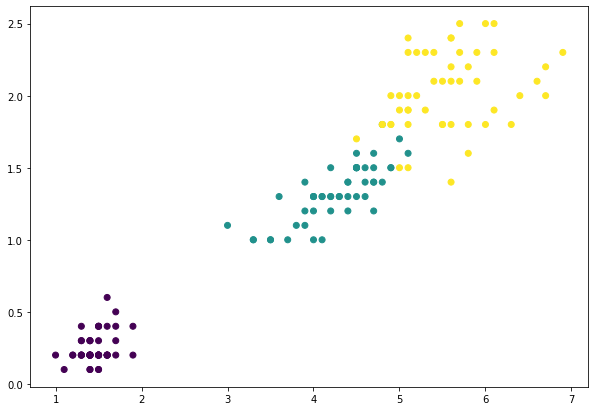

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

plt.figure(figsize=(10, 7))


plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

Dane są 4-wymiarowe, czyli posiadają 4 kolumny, zmienne opisujące. Dla lepszej wizualizacji wybieramy tylko dwie.

In [3]:
data_X = iris.data[iris.target != 0, 2]
data_Y = iris.target[iris.target != 0]
data_Y = np.where(data_Y == data_Y.min(), 0, 1)

Podobnie z klasami - dostępne są 4 gatunki ale sprowadzamy dane do problemy klasyfikacji binarnej.

In [5]:
df = pd.DataFrame({'intercept': 1,
                   'data': data_X,
                   'label': data_Y})
display(df)

X = df[['intercept', 'data']].values
Y = df[['label']].values

,intercept,data,label
0,1,4.7,0
1,1,4.5,0
2,1,4.9,0
3,1,4.0,0
4,1,4.6,0
...,...,...,...
95,1,5.2,1
96,1,5.0,1
97,1,5.2,1
98,1,5.4,1


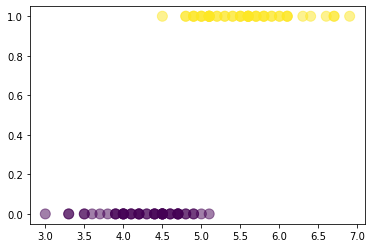

In [6]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.show()

Szukamy funkcji:
$$
\LARGE{p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}},
$$

która najlepiej opisze nasze dane.

In [7]:
beta_0 = -30.
beta_1 = 6.

beta = np.array([[beta_0], [beta_1]])
display(beta)

x = np.concatenate([np.ones((100, 1)), np.linspace(2.5, 8, 100).reshape(-1, 1)], axis=1)

y = x.dot(beta)

p = 1 / (1 + np.exp(- y))

array([[-30.],
       [  6.]])

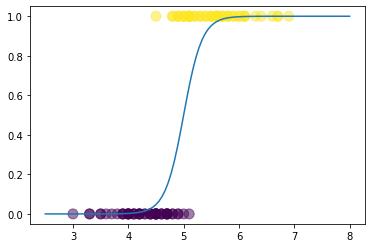

In [8]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.plot(x[:, 1], p)
plt.show()

Obliczamy $log odds$:
$$
\LARGE{\log\left(\frac{p(X)}{1-p(X)}\right)} = \beta_0 + \beta_1X
$$

In [9]:
data_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
data_Y/(1 - data_Y)

/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_54742/1701250205.py:1: RuntimeWarning: divide by zero encountered in divide
  data_Y/(1 - data_Y)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [11]:
print(f"Logarytm z 0 = {np.log(0)}")
print(f"Logarytm z +nieskończoności = {np.log(np.inf)}")

Logarytm z 0 = -inf
Logarytm z +nieskończoności = inf


/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_54742/1924397170.py:1: RuntimeWarning: divide by zero encountered in log
  print(f"Logarytm z 0 = {np.log(0)}")


In [12]:
log_ods = np.log(data_Y/(1 - data_Y))
log_ods

/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_54742/4087979541.py:1: RuntimeWarning: divide by zero encountered in divide
  log_ods = np.log(data_Y/(1 - data_Y))
/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_54742/4087979541.py:1: RuntimeWarning: divide by zero encountered in log
  log_ods = np.log(data_Y/(1 - data_Y))


array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf])

Trudno narysować plus i minus `nieskończoność` na wykresie...

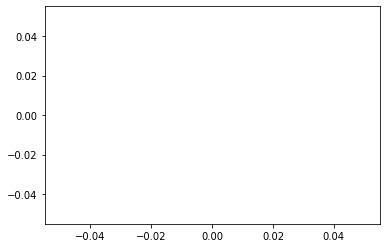

In [14]:
plt.scatter(data_X, log_ods, s=100, alpha=0.5, c=data_Y)
plt.show()

żeby ułatwoć sobie sprawę zastąpmy `nieskończoność` jakąś dużą liczbą (ale rozsądnie dużą)

In [15]:
my_infinity = 20
log_ods_vis = [-my_infinity if x==-np.inf else my_infinity for x in log_ods]

In [16]:
X_log_ods = X.dot(beta)

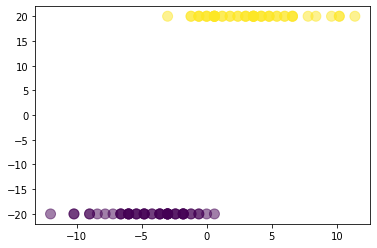

In [17]:
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.show()

In [18]:
log_ods_p = np.log(p/(1-p))
x_log_ods_p = x.dot(beta)

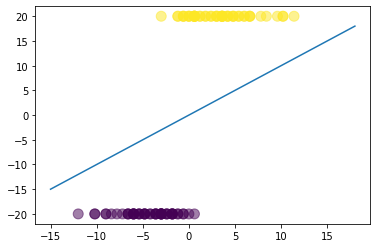

In [19]:
plt.plot(x_log_ods_p, log_ods_p)
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.show()

In [20]:
y_projectcion = X.dot(beta)

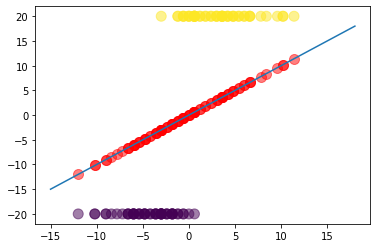

In [21]:
plt.plot(x_log_ods_p, log_ods_p)
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')
plt.show()

In [22]:
prob_y = 1 / (1 + np.exp(-y_projectcion))

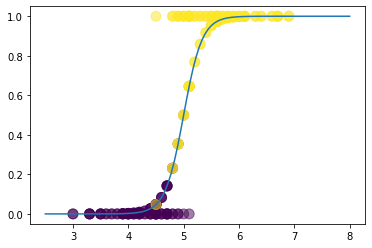

In [23]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
plt.plot(x[:, 1], p)

Lilelihood

In [24]:
lilelihood = np.prod(
    np.where(prob_y >= 0.5, prob_y, 1 - prob_y)
)

print(f"Lilelihood: {lilelihood}")

Lilelihood: 3.6129323935126157e-06


In [25]:
log_lilelihood = np.sum(
    np.log(
        np.where(prob_y >= 0.5, prob_y, 1 - prob_y)
    )
)


print(f"Log-lilelihood: {log_lilelihood}")

Log-lilelihood: -12.530990817982529


In [26]:
import warnings
warnings.filterwarnings('ignore')

beta_0: -26.294623262976447
beta_1: 5.473166081783537


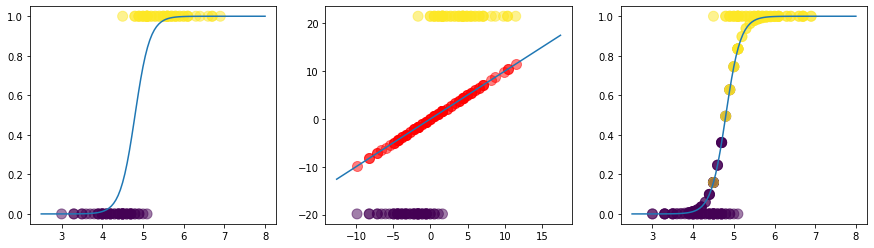

Lilelihood: 1.2446527608560632e-06
Log-lilelihood: -13.596653973892298

beta_0: -27.205833261507312
beta_1: 2.9276697271833796


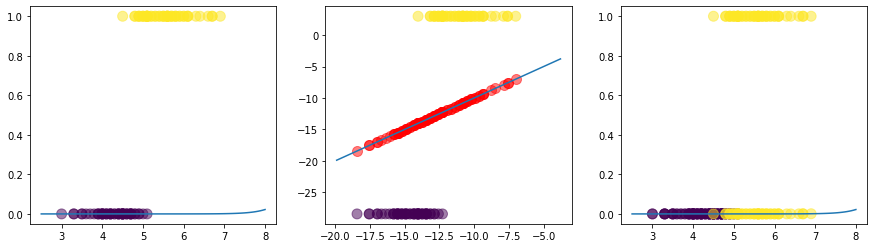

Lilelihood: 0.9963530458860125
Log-lilelihood: -0.0036536204639927715

beta_0: -26.150157233122787
beta_1: 2.2120540650542275


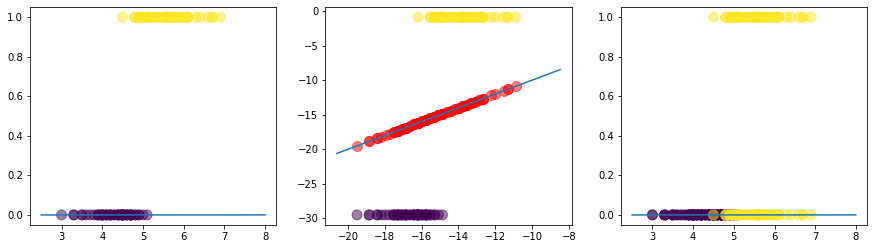

Lilelihood: 0.999888111967596
Log-lilelihood: -0.00011189429233653665

beta_0: -28.6516446768093
beta_1: 7.648364221849655


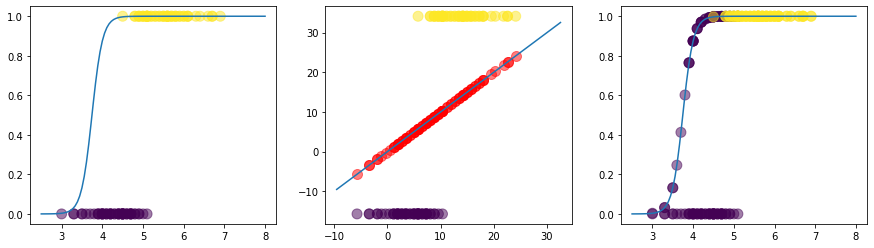

Lilelihood: 0.028484489710387462
Log-lilelihood: -3.5583955605375204

beta_0: -29.88851416033669
beta_1: 1.9689915628253696


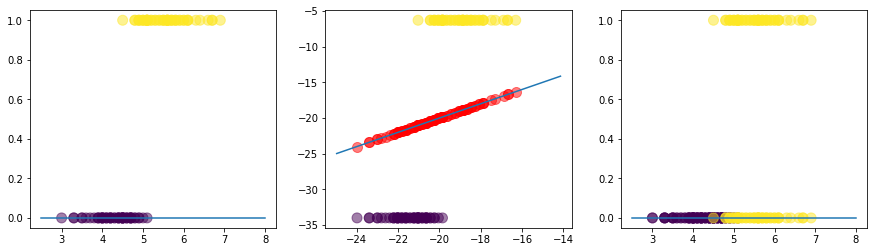

Lilelihood: 0.9999994071383503
Log-lilelihood: -5.928618249323748e-07

beta_0: -27.138973307769902
beta_1: 8.550243820694119


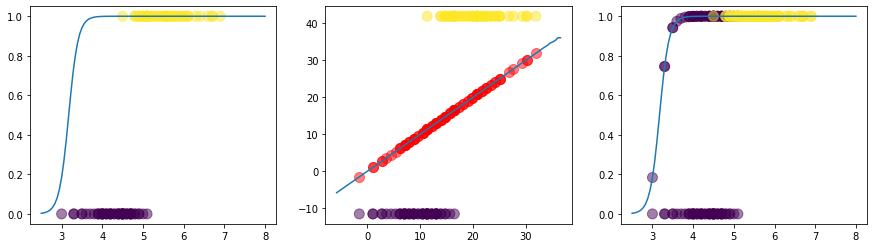

Lilelihood: 0.38152657532783657
Log-lilelihood: -0.9635747705845988

beta_0: -27.91598927583529
beta_1: 1.8216264976991126


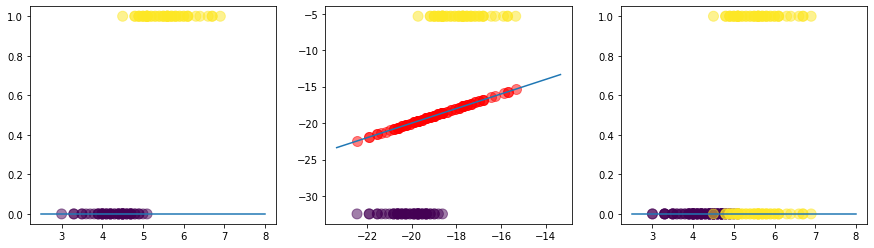

Lilelihood: 0.9999982640609653
Log-lilelihood: -1.7359405409874785e-06

beta_0: -27.599487861771767
beta_1: 4.015145569838536


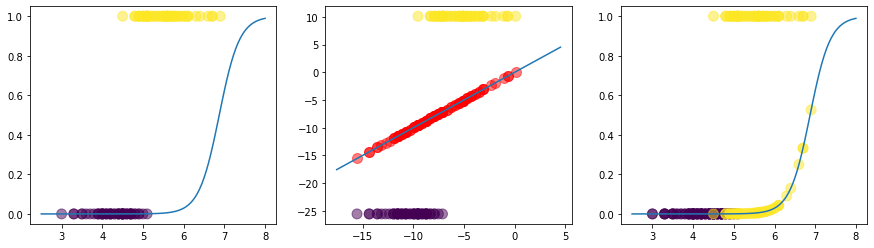

Lilelihood: 0.09622555140734994
Log-lilelihood: -2.341060349432799

beta_0: -29.607166573279592
beta_1: 7.404607854677341


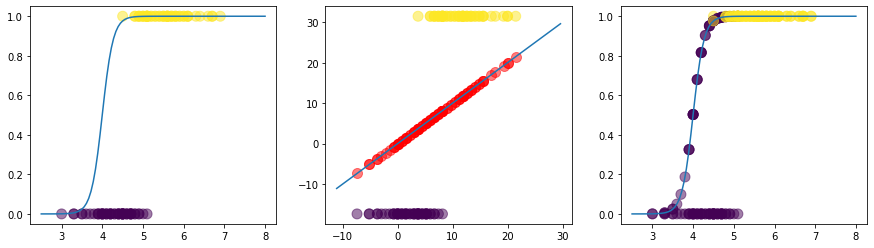

Lilelihood: 0.00045619413179040887
Log-lilelihood: -7.692592111435631

beta_0: -25.429042135284313
beta_1: 3.8143722285693538


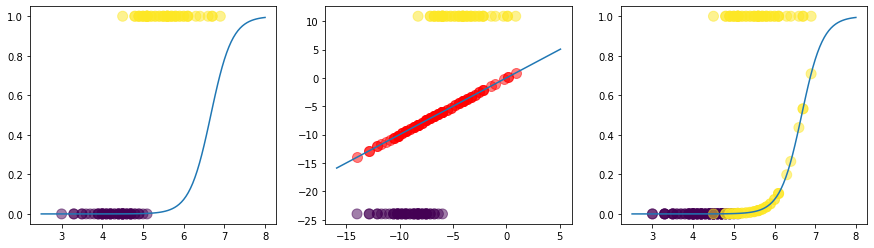

Lilelihood: 0.024952462463441776
Log-lilelihood: -3.6907827657252024



In [27]:
for i in range(10):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

    beta_0 = np.random.uniform(-30, -25)
    beta_1 = np.random.uniform(0, 10)

    print(f"beta_0: {beta_0}")
    print(f"beta_1: {beta_1}")

    x = np.linspace(2.5, 8, 100)
    y = beta_0 + beta_1 * x
    p = 1 / (1 + np.exp(- y))


    ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
    ax1.plot(x, p)


    log_ods = np.log(data_Y/(1 - data_Y))
    
    X_log_ods = beta_0 + beta_1 * data_X

    log_ods_p = np.log(p/(1-p))
    x_log_ods_p = beta_0 + beta_1 * x

    y_projectcion = beta_0 + beta_1 * data_X
    
    log_ods_vis = [(y_projectcion.min() - 10) if x==-np.inf else (y_projectcion.max() + 10) for x in log_ods]

    ax2.plot(x_log_ods_p, log_ods_p)
    ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
    ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

    prob_y = 1 / (1 + np.exp(-y_projectcion))

    ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
    ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
    ax3.plot(x, p)

    plt.show()


    lilelihood = np.prod(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )

    log_lilelihood = np.sum(
        np.log(
            np.where(prob_y > 0.5, prob_y, 1 - prob_y)
        )
    )

    print(f"Lilelihood: {lilelihood}")
    print(f"Log-lilelihood: {log_lilelihood}")
    print()

# Logistic Regression in `sklearn`

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_X.reshape(-1, 1), data_Y)

LogisticRegression()

In [29]:
model.coef_[0, 0]

3.590826892796544

In [30]:
model.intercept_[0]

-17.509046997389063

beta_0: -17.509046997389063
beta_1: 3.590826892796544


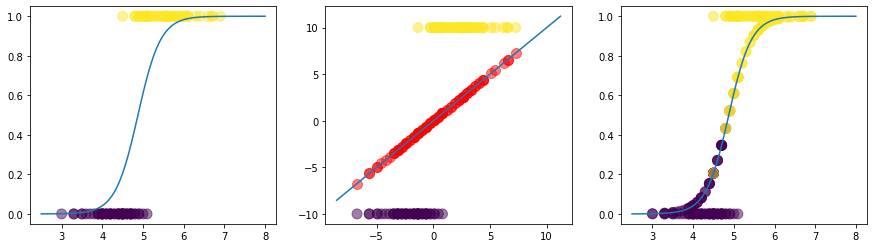

Lilelihood: 3.3318913683494085e-09
Log-lilelihood: -19.519725715709484



In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0, 0]

print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

x = np.linspace(2.5, 8, 100)
y = beta_0 + beta_1 * x
p = 1 / (1 + np.exp(- y))


ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax1.plot(x, p)


log_ods = np.log(data_Y/(1 - data_Y))
log_ods_vis = [-10 if x==-np.inf else 10 for x in log_ods]
X_log_ods = beta_0 + beta_1 * data_X

log_ods_p = np.log(p/(1-p))
x_log_ods_p = beta_0 + beta_1 * x

y_projectcion = beta_0 + beta_1 * data_X

ax2.plot(x_log_ods_p, log_ods_p)
ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

prob_y = 1 / (1 + np.exp(-y_projectcion))

ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
ax3.plot(x, p)

plt.show()


lilelihood = np.prod(
    np.where(prob_y > 0.5, prob_y, 1 - prob_y)
)

log_lilelihood = np.sum(
    np.log(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )
)

print(f"Lilelihood: {lilelihood}")
print(f"Log-lilelihood: {log_lilelihood}")
print()

In [32]:
model.decision_function(data_X.reshape(-1, 1))

array([-0.6321606 , -1.35032598,  0.08600478, -3.14573943, -0.99124329,
       -1.35032598, -0.6321606 , -5.65931825, -0.99124329, -3.50482212,
       -4.94115287, -2.42757405, -3.14573943, -0.6321606 , -4.58207018,
       -1.70940867, -1.35032598, -2.78665674, -1.35032598, -3.50482212,
       -0.27307791, -3.14573943,  0.08600478, -0.6321606 , -2.06849136,
       -1.70940867, -0.27307791,  0.44508747, -1.35032598, -4.94115287,
       -3.8639048 , -4.22298749, -3.50482212,  0.80417016, -1.35032598,
       -1.35032598, -0.6321606 , -1.70940867, -2.78665674, -3.14573943,
       -1.70940867, -0.99124329, -3.14573943, -5.65931825, -2.42757405,
       -2.42757405, -2.42757405, -2.06849136, -6.73656632, -2.78665674,
        4.03591436,  0.80417016,  3.67683167,  2.5995836 ,  3.31774898,
        6.1904105 , -1.35032598,  5.11316243,  3.31774898,  4.39499705,
        0.80417016,  1.52233553,  2.24050091,  0.44508747,  0.80417016,
        1.52233553,  2.24050091,  6.54949318,  7.26765856,  0.44

In [33]:
y_projectcion

array([-0.6321606 , -1.35032598,  0.08600478, -3.14573943, -0.99124329,
       -1.35032598, -0.6321606 , -5.65931825, -0.99124329, -3.50482212,
       -4.94115287, -2.42757405, -3.14573943, -0.6321606 , -4.58207018,
       -1.70940867, -1.35032598, -2.78665674, -1.35032598, -3.50482212,
       -0.27307791, -3.14573943,  0.08600478, -0.6321606 , -2.06849136,
       -1.70940867, -0.27307791,  0.44508747, -1.35032598, -4.94115287,
       -3.8639048 , -4.22298749, -3.50482212,  0.80417016, -1.35032598,
       -1.35032598, -0.6321606 , -1.70940867, -2.78665674, -3.14573943,
       -1.70940867, -0.99124329, -3.14573943, -5.65931825, -2.42757405,
       -2.42757405, -2.42757405, -2.06849136, -6.73656632, -2.78665674,
        4.03591436,  0.80417016,  3.67683167,  2.5995836 ,  3.31774898,
        6.1904105 , -1.35032598,  5.11316243,  3.31774898,  4.39499705,
        0.80417016,  1.52233553,  2.24050091,  0.44508747,  0.80417016,
        1.52233553,  2.24050091,  6.54949318,  7.26765856,  0.44

In [34]:
model.predict(data_X.reshape(-1, 1))

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
model.predict_proba(data_X.reshape(-1, 1))

array([[6.52979210e-01, 3.47020790e-01],
       [7.94182917e-01, 2.05817083e-01],
       [4.78512049e-01, 5.21487951e-01],
       [9.58740515e-01, 4.12594853e-02],
       [7.29333426e-01, 2.70666574e-01],
       [7.94182917e-01, 2.05817083e-01],
       [6.52979210e-01, 3.47020790e-01],
       [9.96527210e-01, 3.47278961e-03],
       [7.29333426e-01, 2.70666574e-01],
       [9.70824662e-01, 2.91753380e-02],
       [9.92904353e-01, 7.09564678e-03],
       [9.18905940e-01, 8.10940603e-02],
       [9.58740515e-01, 4.12594853e-02],
       [6.52979210e-01, 3.47020790e-01],
       [9.89869979e-01, 1.01300213e-02],
       [8.46759570e-01, 1.53240430e-01],
       [7.94182917e-01, 2.05817083e-01],
       [9.41950506e-01, 5.80494942e-02],
       [7.94182917e-01, 2.05817083e-01],
       [9.70824662e-01, 2.91753380e-02],
       [5.67848371e-01, 4.32151629e-01],
       [9.58740515e-01, 4.12594853e-02],
       [4.78512049e-01, 5.21487951e-01],
       [6.52979210e-01, 3.47020790e-01],
       [8.878027

In [36]:
prob_y

array([0.34702079, 0.20581708, 0.52148795, 0.04125949, 0.27066657,
       0.20581708, 0.34702079, 0.00347279, 0.27066657, 0.02917534,
       0.00709565, 0.08109406, 0.04125949, 0.34702079, 0.01013002,
       0.15324043, 0.20581708, 0.05804949, 0.20581708, 0.02917534,
       0.43215163, 0.04125949, 0.52148795, 0.34702079, 0.11219722,
       0.15324043, 0.43215163, 0.6094706 , 0.20581708, 0.00709565,
       0.02055454, 0.01444314, 0.02917534, 0.69086581, 0.20581708,
       0.20581708, 0.34702079, 0.15324043, 0.05804949, 0.04125949,
       0.15324043, 0.27066657, 0.04125949, 0.00347279, 0.08109406,
       0.08109406, 0.08109406, 0.11219722, 0.00118531, 0.05804949,
       0.98263727, 0.69086581, 0.97532143, 0.93083478, 0.96503271,
       0.9979552 , 0.20581708, 0.99401896, 0.96503271, 0.98781148,
       0.69086581, 0.82088214, 0.90382801, 0.6094706 , 0.69086581,
       0.82088214, 0.90382801, 0.9985712 , 0.99930274, 0.6094706 ,
       0.95067149, 0.52148795, 0.9985712 , 0.52148795, 0.95067

In [37]:
df_results = pd.DataFrame(model.predict_proba(data_X.reshape(-1, 1)), columns=['prob_class_0', 'prob_class_1'])
df_results['y'] = data_Y
df_results['pred'] = model.predict(data_X.reshape(-1, 1))
df_results

,prob_class_0,prob_class_1,y,pred
0,0.652979,0.347021,0,0
1,0.794183,0.205817,0,0
2,0.478512,0.521488,0,1
3,0.958741,0.041259,0,0
4,0.729333,0.270667,0,0
...,...,...,...,...
95,0.238077,0.761923,1,1
96,0.390529,0.609471,1,1
97,0.238077,0.761923,1,1
98,0.132226,0.867774,1,1


In [38]:
model.predict_log_proba(data_X.reshape(-1, 1))

array([[-4.26209987e-01, -1.05837059e+00],
       [-2.30441470e-01, -1.58076745e+00],
       [-7.37073887e-01, -6.51069110e-01],
       [-4.21348198e-02, -3.18787425e+00],
       [-3.15624278e-01, -1.30686757e+00],
       [-2.30441470e-01, -1.58076745e+00],
       [-4.26209987e-01, -1.05837059e+00],
       [-3.47883374e-03, -5.66279708e+00],
       [-3.15624278e-01, -1.30686757e+00],
       [-2.96094016e-02, -3.53443152e+00],
       [-7.12094060e-03, -4.94827381e+00],
       [-8.45715125e-02, -2.51214556e+00],
       [-4.21348198e-02, -3.18787425e+00],
       [-4.26209987e-01, -1.05837059e+00],
       [-1.01816791e-02, -4.59225186e+00],
       [-1.66338485e-01, -1.87574715e+00],
       [-2.30441470e-01, -1.58076745e+00],
       [-5.98025474e-02, -2.84645928e+00],
       [-2.30441470e-01, -1.58076745e+00],
       [-2.96094016e-02, -3.53443152e+00],
       [-5.65900848e-01, -8.38978760e-01],
       [-4.21348198e-02, -3.18787425e+00],
       [-7.37073887e-01, -6.51069110e-01],
       [-4.

# `LogisticRegression` - details

[LogisticRegression - doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**penalty : {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’**

Specify the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

> Warning Some penalties may not work with some solvers. See the parameter solver below, to know the compatibility between the penalty and solver.

**solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’**

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

- ‘liblinear’ is limited to one-versus-rest schemes.

> Warning The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
> - ‘newton-cg’ - [‘l2’, ‘none’]
> - ‘lbfgs’ - [‘l2’, ‘none’]
> - ‘liblinear’ - [‘l1’, ‘l2’]
> - ‘sag’ - [‘l2’, ‘none’]
> - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

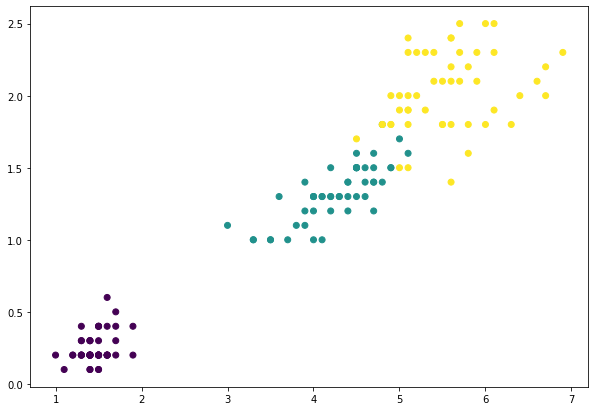

In [39]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

plt.figure(figsize=(10, 7))


plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

In [2]:
iris.data[iris.target != 0]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

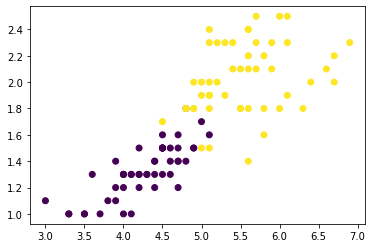

In [40]:
data_X = iris.data[iris.target != 0][:, [2, 3]]
data_Y = iris.target[iris.target != 0]

plt.scatter(data_X[:, 0], data_X[:, 1], c=data_Y)
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data_X, data_Y)

LogisticRegression()

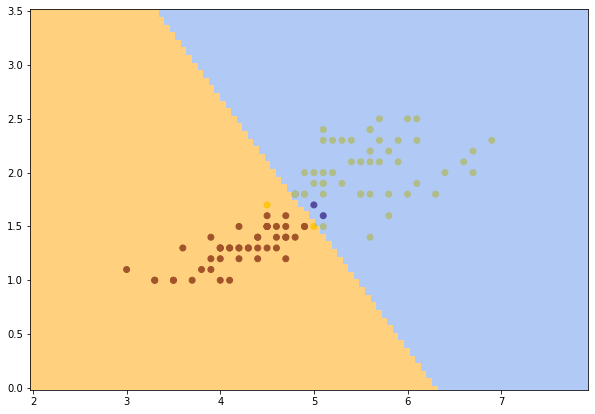

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# DecisionBoundaryDisplay.from_estimator(model, data_X)

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])


fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(data_X[:, 0], data_X[:, 1], c=data_Y)
DecisionBoundaryDisplay.from_estimator(
    model,
    data_X,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    cmap=cmap_light,
    alpha=0.5)